**Machine Learning Master Lectures**

**Simple Linear Regression Model**

Modelizes a linear relationship between
* a variable on y-axis to be explained
* a variable on x-axis which will explain

> Predict Y given X $P(Y~|~ X )$.

The model fit to the data isn't always perfect than we use an error term for indivudal i for make the model fit perfect

$$
yᵢ = a*xᵢ + b + ɛᵢ
$$ where $(a,b) ∈ ℜ$ and $(a,b) \neq (0,0)$

* b: intercept and a: slope
* $ɛᵢ$: random variable for each individual i


1. $ɛᵢs$ are independent random variables ($ɛᵢ⊔ ɛⱼ $, $1\leq i \neq j \leq n$)
2. $E[Yᵢ ~|~ Xᵢ = xᵢ ]$ = $a*xᵢ + b$ ⟺ $E(ɛᵢ) = 0$
3. $Var(Yᵢ ~|~ Xᵢ = xᵢ) = $



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

We'll start with naive Bayes classification which is a supervised method (who works with training data)






---



---



---



---



---




# **Some ML Lectures in GSU data science master**

---

---



---



---



---





## **Simple Linear Regression**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


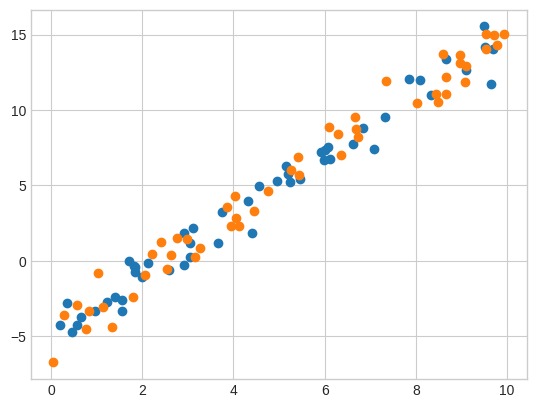

In [ ]:
#Random seedlerine göre farklı 10 adet x generate edip y=2x-5+rng çıkartıyoruz
rng = np.random.RandomState(42)
x = 10 * rng.rand(50) #0 ve 1 arasında 50 float generate ediyo
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y); #x de y de list
#for i in range(len(x)):
#    print(f"Nokta {i+1}: (x = {x[i]}, y = {y[i]})")

rng = np.random.RandomState(43)
t = 10 * rng.rand(50) #0 ve 1 arasında 50 sayı generate ediyo
z = 2 * t - 5 + rng.randn(50)
plt.scatter(t, z);
#for i in range(len(t)):
#    print(f"Nokta {i+1}: (t = {t[i]}, z = {z[i]})")

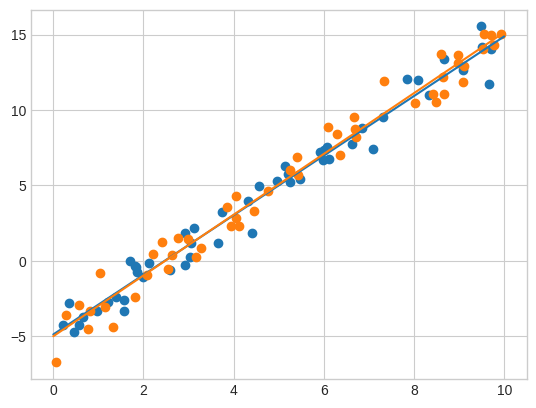

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept=True)
model1.fit(x[:, np.newaxis], y)#Fit ederken newaxis ile birlikte x'i 1D lin regden 2Dye çıkarıyo
#Bundan sonra model x ve y arasındaki ilişkiyi algılıyor

model2 = LinearRegression(fit_intercept=True)
model2.fit(t[:, np.newaxis], z)

xfit = np.linspace(0, 10, 1000) #Yeni 1000 tane x üretiyor
#print(xfit[:, np.newaxis])
yfit = model1.predict(xfit[:, np.newaxis]) #xfit lere yeni boyut ekliyor ve predict ediyo yleri

tfit = np.linspace(0, 10, 1000)
zfit = model2.predict(tfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

plt.scatter(t, z)
plt.plot(tfit, zfit);

In [ ]:
print("Model 1 slope:    ", model1.coef_[0]) #Bunda tek bir bağımsız değişken x olduğu için coef_[0]
print("Model 1 intercept:", model1.intercept_) #y-eksenini kestiği noktalar

print("Model 2 slope:    ", model2.coef_[0])
print("Model 2 intercept:", model2.intercept_)

Model 1 slope:     1.9776566003853107
Model 1 intercept: -4.903310725531115
Model 2 slope:     2.0168392382175107
Model 2 intercept: -5.024461318968481


The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
#3 boyutlu linear regression örneği ama virtualise etmek çok zor
#y=a_0+a_1*x_1+a_2*x_2+a_3*x_3

rng = np.random.RandomState(1) #Seed 1
X = 10 * rng.rand(100, 3) #3 sütunlu yani 3 boyutlu oluşturuyor 0 ve 1 arası total 100 tane
y = 0.5 + np.dot(X, [1.5, -2., 1.]) #Dot product yapıyo np.dot şunu öğren be oğuz artık

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

NameError: ignored

## **Basis Function Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(degree = 3, include_bias=False)
poly.fit_transform(x[:, None]) #Önce vektör yapıyor sonra polynomial yapıyor


In [ ]:
from sklearn.feature_extraction import DictVectorizer

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
] #Features
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}; #İsimleri sayılaştırıyor

vec = DictVectorizer(sparse=False, dtype=int) #Sözlükleri sayısal vektörlere dönüştürüyor
#Sparse False olduğu için dense(yoğun) bir matris oluşturuyo ve vektörün elemanları tam sayı
vec.fit_transform(data) #Hem fit ettirtiyo hem de dönüştürüyo sayısal vektöre

vec.get_feature_names_out()

#There is one clear disadvantage of this approach: if your category has many
#possible values, this can greatly increase the size of your dataset. However,
#because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:
vec = DictVectorizer(sparse=True, dtype=int) #Burada da sparse seyrek matrix hali
vec.fit_transform(data)

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vec = CountVectorizer() #Kelimeleri saymaya yarıyor
X = vec.fit_transform(sample) #Hem fit ettiriyo hem de sayısal matrise dönüştürüyor ama Sparse

pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
#toarray Sparse'ı dense'e çeviriyor ve kolonları isimlerden seçiyor

vec = TfidfVectorizer()
#Bu vektörleştirici saydığı terim frekansını hesaplayarak önemini değerlendiriyor
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## **Regularization**

Buna çalış ya hyper parametres ve linear regressionda sectionu var

## **Example: Predicting Bicycle Traffic**

In [ ]:
url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main'
!curl -O {url}/FremontBridge.csv
!curl -O {url}/SeattleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4585k  100 4585k    0     0   9.9M      0 --:--:-- --:--:-- --:--:--  9.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  534k  100  534k    0     0  1771k      0 --:--:-- --:--:-- --:--:-- 1775k


In [ ]:
import pandas as pd

counts = pd.read_csv('FremontBridge.csv',
                     index_col='Date', parse_dates=True)
weather = pd.read_csv('SeattleWeather.csv',
                      index_col='DATE', parse_dates=True)

In [ ]:
counts = counts[counts.index < "2020-01-01"]
weather = weather[weather.index < "2020-01-01"]

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
"""
def encode_day(day_of_week):
    "Haftanın gününü 3-bit ikili kodlama sistemine dönüştür"
    encoding = {
        0: [1, 0, 0], # Pazartesi
        1: [0, 1, 0], # Salı
        2: [0, 0, 1], # Çarşamba
        3: [1, 1, 0], # Perşembe hazret
        4: [1, 0, 1], # Cuma
        5: [1, 1, 1], # Cumartesi
        6: [0, 1, 1]  # Pazar
    }
    return encoding.get(day_of_week, [0, 0, 0]) # Eğer bilinmeyen bir günse [0, 0, 0] döndür

days_encoded = daily.index.dayofweek.map(encode_day)
daily['Bit1'], daily['Bit2'], daily['Bit3'] = zip(*days_encoded)
"""

'\ndef encode_day(day_of_week):\n    "Haftanın gününü 3-bit ikili kodlama sistemine dönüştür"\n    encoding = {\n        0: [1, 0, 0], # Pazartesi\n        1: [0, 1, 0], # Salı\n        2: [0, 0, 1], # Çarşamba\n        3: [1, 1, 0], # Perşembe hazret\n        4: [1, 0, 1], # Cuma\n        5: [1, 1, 1], # Cumartesi\n        6: [0, 1, 1]  # Pazar\n    }\n    return encoding.get(day_of_week, [0, 0, 0]) # Eğer bilinmeyen bir günse [0, 0, 0] döndür\n\ndays_encoded = daily.index.dayofweek.map(encode_day)\ndaily[\'Bit1\'], daily[\'Bit2\'], daily[\'Bit3\'] = zip(*days_encoded)\n'

Benim 3 bitli denemem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encoding
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

X = daily[days]
y = daily['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_one_hot = mean_squared_error(y_test, y_pred)


In [ ]:
def encode_day(day_of_week):
    encoding = {
        0: [1, 0, 0],
        1: [0, 1, 0],
        2: [0, 0, 1],
        3: [1, 1, 0],
        4: [1, 0, 1],
        5: [1, 1, 1],
        6: [0, 1, 1]
    }
    return encoding.get(day_of_week, [0, 0, 0])

days_encoded = daily.index.dayofweek.map(encode_day)
daily['Bit1'], daily['Bit2'], daily['Bit3'] = zip(*days_encoded)

X = daily[['Bit1', 'Bit2', 'Bit3']]
y = daily['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_3bit = mean_squared_error(y_test, y_pred)


In [ ]:
print(f"MSE for One-Hot Encoding: {mse_one_hot}")
print(f"MSE for 3-Bit Encoding: {mse_3bit}")


MSE for One-Hot Encoding: 19891355.72426818
MSE for 3-Bit Encoding: 22484836.111499265


In [ ]:
# 3-bit encoding for days
encoding_3bit = {
    0: [1, 0, 0],
    1: [0, 1, 0],
    2: [0, 0, 1],
    3: [1, 1, 0],
    4: [1, 0, 1],
    5: [1, 1, 1],
    6: [0, 1, 1]
}

# Encoding days using the 3-bit representation
for iday in enumerate(days):
    for j, bit in enumerate(encoding_3bit[i]):
        daily[f"{day}_bit_{j}"] = (daily.index.dayofweek == i).astype(float) * bit

# Selecting the 3-bit encoded columns for the input dataset
X_3bit = daily[[f"{day}_bit_{j}" for day in days for j in range(3)]]

# Splitting the dataset into training and test sets
X_train_3bit, X_test_3bit, y_train_3bit, y_test_3bit = train_test_split(X_3bit, y, test_size=0.3, random_state=42)

# Training the model using the 3-bit encoded data
model_3bit = LinearRegression()
model_3bit.fit(X_train_3bit, y_train_3bit)

# Predicting using the 3-bit encoded model
y_pred_3bit = model_3bit.predict(X_test_3bit)
mse_3bit = mean_squared_error(y_test_3bit, y_pred_3bit)


NameError: ignored

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculating residuals for both models
residuals_one_hot = y_test - y_pred
residuals_3bit = y_test_3bit - y_pred_3bit

# Q-Q plot for one-hot encoded model
plt.subplot(1, 2, 1)
stats.probplot(residuals_one_hot, dist="norm", plot=plt)
plt.title("Q-Q Plot (One-Hot Encoding)")

# Q-Q plot for 3-bit encoded model
plt.subplot(1, 2, 2)
stats.probplot(residuals_3bit, dist="norm", plot=plt)
plt.title("Q-Q Plot (3-bit Encoding)")

plt.tight_layout()
plt.show()


NameError: ignored

19885031.62978662
19891355.72426818


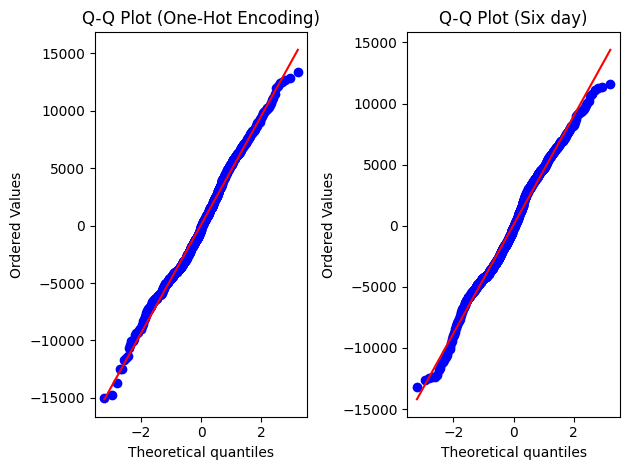

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for i in range(6):  # Sadece 6 gün için döngü oluşturuyoruz
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

X = daily[days]
y = daily['Total']

X_train_sixday, X_test_sixday, y_train_sixday, y_test_sixday = train_test_split(X, y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train_sixday, y_train_sixday)

y_pred_sixday = model.predict(X_test_sixday)
mse_six_days = mean_squared_error(y_test_sixday, y_pred_sixday)
print(mse_six_days)
print(mse_one_hot)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculating residuals for both models
residuals_one_hot = y_test - y_pred
residuals_sixday = y_test_sixday - y_pred_sixday

# Q-Q plot for one-hot encoded model
plt.subplot(1, 2, 1)
stats.probplot(residuals_one_hot, dist="norm", plot=plt)
plt.title("Q-Q Plot (One-Hot Encoding)")

# Q-Q plot for 3-bit encoded model
plt.subplot(1, 2, 2)
stats.probplot(residuals_sixday, dist="norm", plot=plt)
plt.title("Q-Q Plot (Six day)")

plt.tight_layout()
plt.show()


In [ ]:
toplam1 = 0 # Öncelikle tek tek karelerinin toplamını arıyorum
for a in range(1, 101):
  toplam1 += a**2
toplam2 = 0
for i in range(1, 101):
  toplam2 = i + toplam2
toplam2 = toplam2**2

print(toplam1, toplam2, toplam1-toplam2)



338350 25502500 -25164150


In [ ]:
37107287533902102798797998220837590246510135740250+
46376937677490009712648124896970078050417018260538+
74324986199524741059474233309513058123726617309629+
91942213363574161572522430563301811072406154908250+
23067588207539346171171980310421047513778063246676+
89261670696623633820136378418383684178734361726757+
28112879812849979408065481931592621691275889832738+
44274228917432520321923589422876796487670272189318+
47451445736001306439091167216856844588711603153276+ 70386486105843025439939619828917593665686757934951+ 62176457141856560629502157223196586755079324193331+64906352462741904929101432445813822663347944758178+92575867718337217661963751590579239728245598838407+58203565325359399008402633568948830189458628227828 +80181199384826282014278194139940567587151170094390+35398664372827112653829987240784473053190104293586+86515506006295864861532075273371959191420517255829+71693888707715466499115593487603532921714970056938+54370070576826684624621495650076471787294438377604 +53282654108756828443191190634694037855217779295145 + 36123272525000296071075082563815656710885258350721 + 45876576172410976447339110607218265236877223636045 + 17423706905851860660448207621209813287860733969412 + 81142660418086830619328460811191061556940512689692 + 51934325451728388641918047049293215058642563049483 + 62467221648435076201727918039944693004732956340691 + 15732444386908125794514089057706229429197107928209 + 55037687525678773091862540744969844508330393682126 + 18336384825330154686196124348767681297534375946515 + 80386287592878490201521685554828717201219257766954 + 78182833757993103614740356856449095527097864797581 + 16726320100436897842553539920931837441497806860984 + 48403098129077791799088218795327364475675590848030 + 87086987551392711854517078544161852424320693150332 + 59959406895756536782107074926966537676326235447210 + 69793950679652694742597709739166693763042633987085 + 41052684708299085211399427365734116182760315001271 + 65378607361501080857009149939512557028198746004375 + 35829035317434717326932123578154982629742552737307 + 94953759765105305946966067683156574377167401875275 + 88902802571733229619176668713819931811048770190271 + 25267680276078003013678680992525463401061632866526 + 36270218540497705585629946580636237993140746255962 + 24074486908231174977792365466257246923322810917141 + 91430288197103288597806669760892938638285025333403 + 34413065578016127815921815005561868836468420090470 + 23053081172816430487623791969842487255036638784583 + 11487696932154902810424020138335124462181441773470 + 63783299490636259666498587618221225225512486764533 + 67720186971698544312419572409913959008952310058822 + 95548255300263520781532296796249481641953868218774 + 76085327132285723110424803456124867697064507995236 + 37774242535411291684276865538926205024910326572967 + 23701913275725675285653248258265463092207058596522 + 29798860272258331913126375147341994889534765745501 + 18495701454879288984856827726077713721403798879715 + 38298203783031473527721580348144513491373226651381 + 34829543829199918180278916522431027392251122869539 + 40957953066405232632538044100059654939159879593635 + 29746152185502371307642255121183693803580388584903 + 41698116222072977186158236678424689157993532961922 + 62467957194401269043877107275048102390895523597457 + 23189706772547915061505504953922979530901129967519 + 86188088225875314529584099251203829009407770775672 + 11306739708304724483816533873502340845647058077308 + 82959174767140363198008187129011875491310547126581 + 97623331044818386269515456334926366572897563400500 + 42846280183517070527831839425882145521227251250327 + 55121603546981200581762165212827652751691296897789 + 32238195734329339946437501907836945765883352399886 + 75506164965184775180738168837861091527357929701337 + 62177842752192623401942399639168044983993173312731 + 32924185707147349566916674687634660915035914677504 + 99518671430235219628894890102423325116913619626622 + 73267460800591547471830798392868535206946944540724 + 76841822524674417161514036427982273348055556214818 + 97142617910342598647204516893989422179826088076852 + 87783646182799346313767754307809363333018982642090 + 10848802521674670883215120185883543223812876952786 + 71329612474782464538636993009049310363619763878039 + 62184073572399794223406235393808339651327408011116 + 66627891981488087797941876876144230030984490851411 + 60661826293682836764744779239180335110989069790714 + 85786944089552990653640447425576083659976645795096 + 66024396409905389607120198219976047599490197230297 + 64913982680032973156037120041377903785566085089252 + 16730939319872750275468906903707539413042652315011 + 94809377245048795150954100921645863754710598436791 + 78639167021187492431995700641917969777599028300699 + 15368713711936614952811305876380278410754449733078 + 40789923115535562561142322423255033685442488917353 + 44889911501440648020369068063960672322193204149535 + 41503128880339536053299340368006977710650566631954 + 81234880673210146739058568557934581403627822703280 + 82616570773948327592232845941706525094512325230608 + 22918802058777319719839450180888072429661980811197 + 77158542502016545090413245809786882778948721859617 + 72107838435069186155435662884062257473692284509516 + 20849603980134001723930671666823555245252804609722 + 53503534226472524250874054075591789781264330331690

In [ ]:
"""
c=0
for a in range(1,600):
  for b in range(1,600):
    for c in range(1,600):
      if c**2==a**2+b**2 and a+b+c==1000:
        print(a,b,c)
"""

200*375*425

31875000/(50**3)

255.0

## Multilayer Perceptron From Scratch

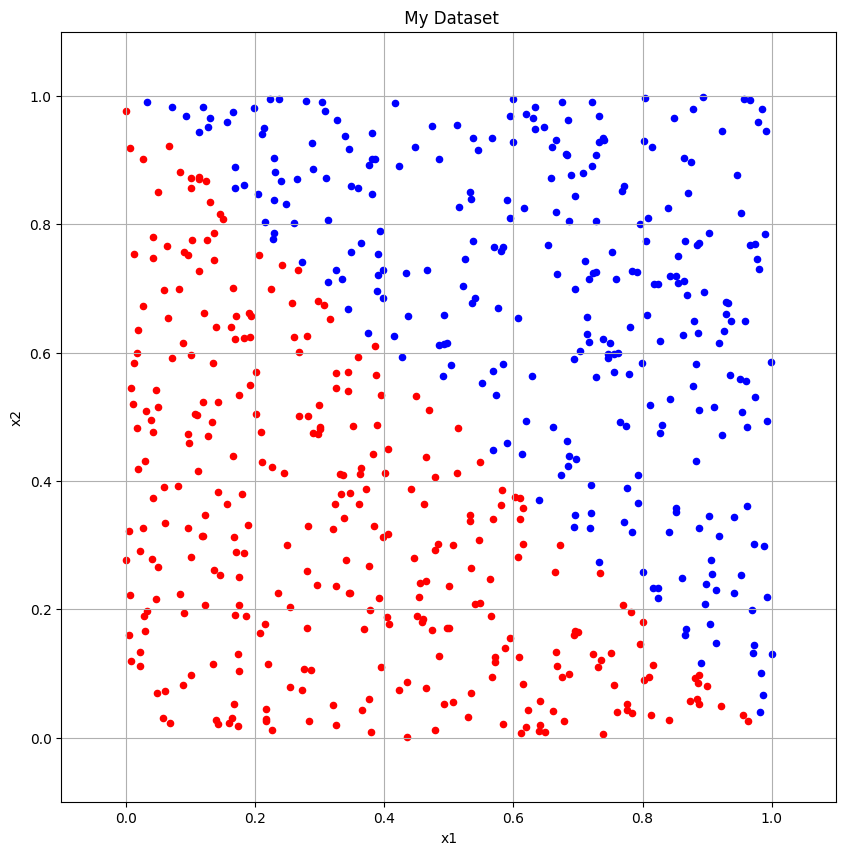

In [ ]:
#https://www.kaggle.com/code/vitorgamalemos/multilayer-perceptron-from-scratch/notebook buradan hepsi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer

    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture

    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation

data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
data.head()

def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(' My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

data['y'] = data.apply(testing, axis=1)


fig = plt.figure(figsize=(10,10))
show_dataset(data, fig.gca())









